In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data
import missingno
import seaborn as sns
from datetime import datetime
import time
import utils.pandas_utils as pu
import utils.visualization_tb as vu
import plotly.graph_objects as go


%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:

df_20 = pu.leer_csv('../resources/agencia_empleo_inscritos_2020.csv')
df_20
print("Nos descargamos el csv del paro registrado en Madrid en 2020")

Nos descargamos el csv del paro registrado en Madrid en 2020


1. Limpieza de datos

In [3]:
df_20.describe
print("Chequeamos nuestro csv a través de la función describe")

Chequeamos nuestro csv a través de la función describe


Vista de nuestro dataset para visualizar valores nulos por columnas:


,Fecha de Inscripción,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,Código Objetivo Profesional 2,Objetivo Profesional 2,Código Objetivo Profesional 3,Objetivo Profesional 3
3,ene-20,Mujer,Ciudad Lineal,Entre 56 y 65 años,Española,5710.0,Trabajadores de los cuidados personales a domi...,9210.0,"Personal de limpieza de oficinas, hoteles y ot...",NaN,NaN
7,ene-20,Hombre,Hortaleza,Menor de 25 años,Española,NaN,NaN,NaN,NaN,NaN,NaN
11,ene-20,Mujer,Vicálvaro,Entre 26 y 35 años,Comunitaria,2463.0,Ingenieros técnicos mecánicos,NaN,NaN,NaN,NaN


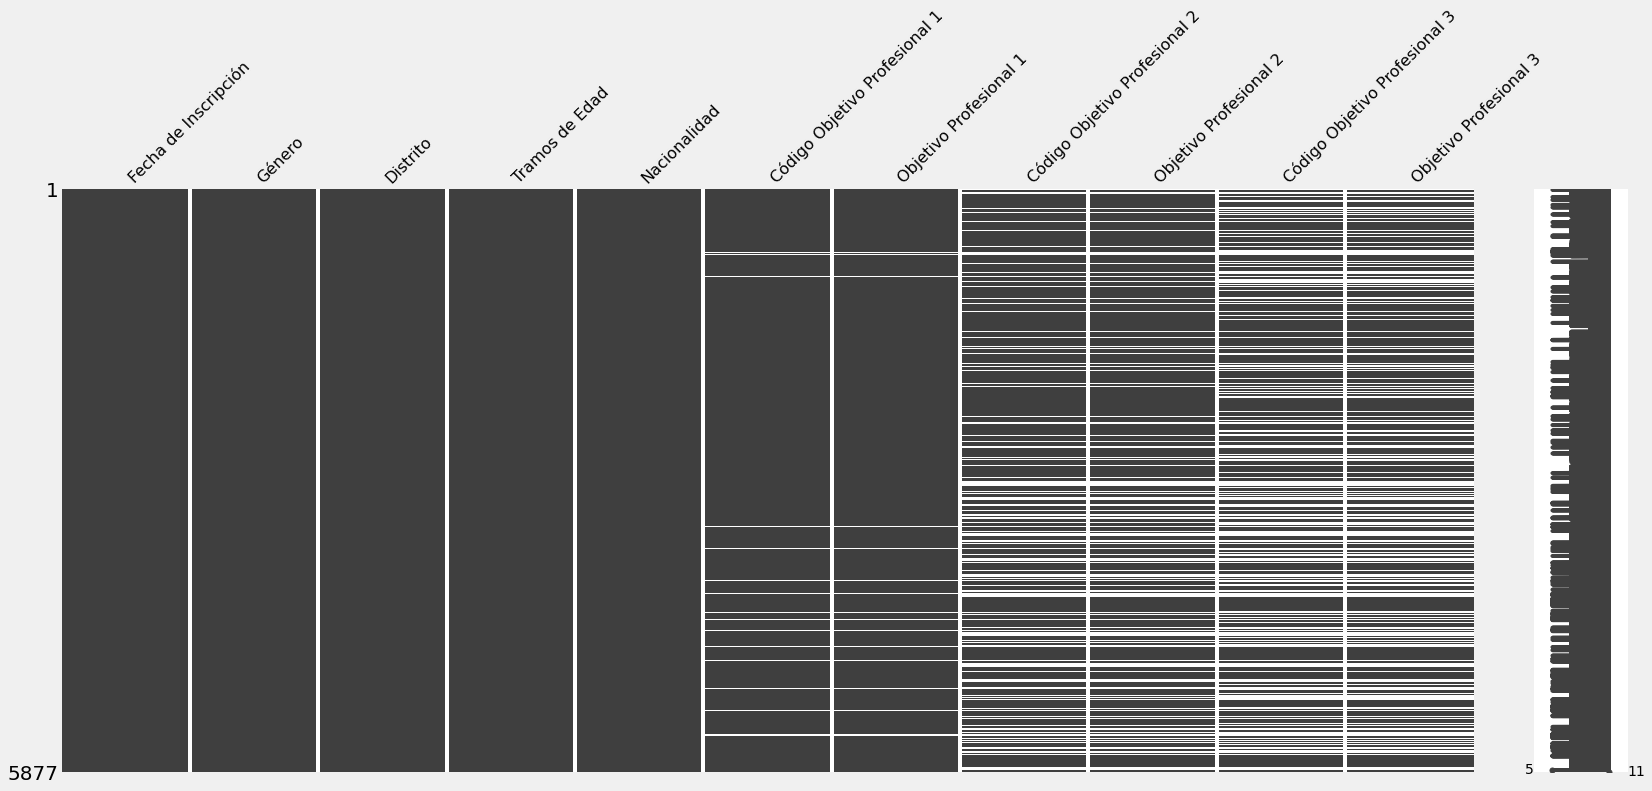

In [4]:
if len(df_20[df_20.isnull().any(axis=1)] != 0):
    print("Vista de nuestro dataset para visualizar valores nulos por columnas:")
    display(df_20[df_20.isnull().any(axis=1)].head(3))
    missingno.matrix(df_20)
    plt.show()



In [5]:
print("Seguimos haciedo un chequeo de los valores nulos")
df =df_20
dfX=pd.DataFrame()
dfX["nulos"] = df.isnull().sum()
dfX["total"] = df.count()
dfX["porcentaje_nulos"] = dfX["nulos"] /  dfX["total"] 
dfX



Seguimos haciedo un chequeo de los valores nulos


,nulos,total,porcentaje_nulos
Fecha de Inscripción,0,5877,0.000000
Género,0,5877,0.000000
Distrito,0,5877,0.000000
Tramos de Edad,0,5877,0.000000
Nacionalidad,0,5877,0.000000
Código Objetivo Profesional 1,237,5640,0.042021
Objetivo Profesional 1,237,5640,0.042021
Código Objetivo Profesional 2,1411,4466,0.315943
Objetivo Profesional 2,1411,4466,0.315943
Código Objetivo Profesional 3,2292,3585,0.639331


In [6]:
columns_to_drop_na= [c for c in df.columns if "Objetivo" in c]
print(f"Eliminaremos los datos que tengan valores inválidos para TODAS las columnas:\n{columns_to_drop_na}")


print(f"Antes de eliminar inválidos: {len(df_20)}")
resultado = df_20.dropna(subset=columns_to_drop_na, how='all')


print(f"Resultados inválidos: {len(df_20)-len(resultado)}")
resultado

Eliminaremos los datos que tengan valores inválidos para TODAS las columnas:
['Código Objetivo Profesional 1', 'Objetivo Profesional 1', 'Código Objetivo Profesional 2', 'Objetivo Profesional 2', 'Código Objetivo Profesional 3', 'Objetivo Profesional 3']
Antes de eliminar inválidos: 5877
Resultados inválidos: 237


,Fecha de Inscripción,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,Código Objetivo Profesional 2,Objetivo Profesional 2,Código Objetivo Profesional 3,Objetivo Profesional 3
0,ene-20,Hombre,Puente De Vallecas,Entre 26 y 35 años,Española,8420.0,Conductores de autobuses y tranvías,8412.0,"Conductores asalariados de automóviles, taxis ...",8412.0,"Conductores asalariados de automóviles, taxis ..."
1,ene-20,Hombre,Vicálvaro,Entre 26 y 35 años,Extracomunitaria,5220.0,Vendedores en tiendas y almacenes,9811.0,Peones del transporte de mercancías y descarga...,9210.0,"Personal de limpieza de oficinas, hoteles y ot..."
2,ene-20,Hombre,Otro Municipio,Menor de 25 años,Española,9602.0,Peones de la construcción de edificios,9310.0,Ayudantes de cocina,5120.0,Camareros asalariados
3,ene-20,Mujer,Ciudad Lineal,Entre 56 y 65 años,Española,5710.0,Trabajadores de los cuidados personales a domi...,9210.0,"Personal de limpieza de oficinas, hoteles y ot...",NaN,NaN
4,ene-20,Hombre,Arganzuela,Entre 46 y 55 años,Española,6120.0,"Trabajadores cualificados en huertas, invernad...",9210.0,"Personal de limpieza de oficinas, hoteles y ot...",5120.0,Camareros asalariados
...,...,...,...,...,...,...,...,...,...,...,...
5872,jun-20,Mujer,Otro Municipio,Entre 46 y 55 años,Española,2625.0,Especialistas en formación de personal,3621.0,Profesionales de apoyo de la Administración Pú...,3613.0,Asistentes de dirección y administrativos
5873,jun-20,Mujer,Otro Municipio,Entre 36 y 45 años,Española,4309.0,Empleados administrativos sin tareas de atenci...,4301.0,Grabadores de datos,2912.0,"Bibliotecarios, documentalistas y afines"
5874,jun-20,Hombre,Otro Municipio,Entre 46 y 55 años,Española,2230.0,Profesores de enseñanza secundaria (excepto ma...,2311.0,Profesores de educación especial,2220.0,Profesores de formación profesional (materias ...
5875,jun-20,Mujer,Centro,Entre 46 y 55 años,Española,3532.0,Organizadores de conferencias y eventos,2652.0,Profesionales de relaciones públicas,3613.0,Asistentes de dirección y administrativos


In [7]:
print("Eliminamos las filas que contengan solamente valores NaN")
df_20.dropna(axis=0, how="all", inplace=True)
df_20.head(10)

Eliminamos las filas que contengan solamente valores NaN


,Fecha de Inscripción,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,Código Objetivo Profesional 2,Objetivo Profesional 2,Código Objetivo Profesional 3,Objetivo Profesional 3
0,ene-20,Hombre,Puente De Vallecas,Entre 26 y 35 años,Española,8420.0,Conductores de autobuses y tranvías,8412.0,"Conductores asalariados de automóviles, taxis ...",8412.0,"Conductores asalariados de automóviles, taxis ..."
1,ene-20,Hombre,Vicálvaro,Entre 26 y 35 años,Extracomunitaria,5220.0,Vendedores en tiendas y almacenes,9811.0,Peones del transporte de mercancías y descarga...,9210.0,"Personal de limpieza de oficinas, hoteles y ot..."
2,ene-20,Hombre,Otro Municipio,Menor de 25 años,Española,9602.0,Peones de la construcción de edificios,9310.0,Ayudantes de cocina,5120.0,Camareros asalariados
3,ene-20,Mujer,Ciudad Lineal,Entre 56 y 65 años,Española,5710.0,Trabajadores de los cuidados personales a domi...,9210.0,"Personal de limpieza de oficinas, hoteles y ot...",NaN,NaN
4,ene-20,Hombre,Arganzuela,Entre 46 y 55 años,Española,6120.0,"Trabajadores cualificados en huertas, invernad...",9210.0,"Personal de limpieza de oficinas, hoteles y ot...",5120.0,Camareros asalariados
5,ene-20,Mujer,Puente De Vallecas,Entre 56 y 65 años,Española,5833.0,Conserjes de edificios,9210.0,"Personal de limpieza de oficinas, hoteles y ot...",9310.0,Ayudantes de cocina
6,ene-20,Mujer,Villaverde,Menor de 25 años,Extracomunitaria,5722.0,Cuidadores de niños en domicilios,9820.0,Reponedores,9210.0,"Personal de limpieza de oficinas, hoteles y ot..."
7,ene-20,Hombre,Hortaleza,Menor de 25 años,Española,NaN,NaN,NaN,NaN,NaN,NaN
8,ene-20,Hombre,Latina,Entre 46 y 55 años,Española,9431.0,Ordenanzas,5942.0,Auxiliares de vigilante de seguridad y similar...,4424.0,Teleoperadores
9,ene-20,Mujer,Puente De Vallecas,Entre 26 y 35 años,Extracomunitaria,9100.0,Empleados domésticos,9210.0,"Personal de limpieza de oficinas, hoteles y ot...",9820.0,Reponedores


Nuestro dataframe contiene una columna llamada "Fecha de Inscripción" cuyas fechas utilizaremos como índice de referencia. 
Para ello, primero convertimos las fechas en un diccionario, y una vez traducidas, las pasaremos a formato datetime. 
El siguiente ejemplo nos sirve de prueba para entender lo que estamos haciendo:

In [8]:
def fecha_sp_a_en(fecha):
    diccionario ={"ene":"jan" ,
    "feb":"feb" ,
    "mar":"mar" ,
    "abr":"apr" ,
    "may":"may" ,
    "jun":"jun" ,
    "jul":"jul" ,
    "ago":"aug" ,
    "sep":"sep" ,
    "oct":"oct" ,
    "nov":"nov" ,
    "dic":"dec" }
    try:
        #Los tres primeros caracteres son del mes. Ejemplo: fecha: ene-20 = mes:"ene"
        mes = fecha[0:3].lower()
        #Traducimos el mes a inglés
        mes_en_ingles = diccionario[mes]
        return mes_en_ingles + fecha[3:] # Nos quedamos con lo que hay a la derecha del mes  fecha: ene-20 =>"-20"
    except:
        return fecha
#Hacemos una prueba
original = pd.DataFrame(["jan-20", "ene-20", np.nan])[0]
t=original.apply(fecha_sp_a_en)

v= pd.to_datetime(t, format="%b-%y")


print(original)
print("="*20)
print(t)
print("="*20)
print(v)
print("="*20)
print(v.dt.strftime("%m___%Y"))

0    jan-20
1    ene-20
2       NaN
Name: 0, dtype: object
0    jan-20
1    jan-20
2       NaN
Name: 0, dtype: object
0   2020-01-01
1   2020-01-01
2          NaT
Name: 0, dtype: datetime64[ns]
0    01___2020
1    01___2020
2          NaN
Name: 0, dtype: object


Ahora que sabemos cómo convertir nuestras fechas a formato datetime, lo aplicamos a la columna "Fecha de Inscripción" de nuestro dataset:

In [9]:
def fecha_sp_a_en(fecha):
    diccionario ={"ene":"jan" ,
    "feb":"feb" ,
    "mar":"mar" ,
    "abr":"apr" ,
    "may":"may" ,
    "jun":"jun" ,
    "jul":"jul" ,
    "ago":"aug" ,
    "sep":"sep" ,
    "oct":"oct" ,
    "nov":"nov" ,
    "dic":"dec" }
    try:
        #Los tres primeros caracteres son del mes. Ejemplo: fecha: ene-20 = mes:"ene"
        mes = fecha[0:3].lower()
        #Traducimos el mes a inglés
        mes_en_ingles = diccionario[mes]
        return mes_en_ingles + fecha[3:] # Nos quedamos con lo que hay a la derecha del mes  fecha: ene-20 =>"-20"
    except:
        return fecha
      
       
        #Hacemos una prueba
original = df_20["Fecha de Inscripción"]
t=original.apply(fecha_sp_a_en)

v= pd.to_datetime(t, format="%b-%y")


print(original)
print("="*20)
print(t)
print("="*20)
print(v)


0       ene-20
1       ene-20
2       ene-20
3       ene-20
4       ene-20
         ...  
5872    jun-20
5873    jun-20
5874    jun-20
5875    jun-20
5876    jun-20
Name: Fecha de Inscripción, Length: 5877, dtype: object
0       jan-20
1       jan-20
2       jan-20
3       jan-20
4       jan-20
         ...  
5872    jun-20
5873    jun-20
5874    jun-20
5875    jun-20
5876    jun-20
Name: Fecha de Inscripción, Length: 5877, dtype: object
0      2020-01-01
1      2020-01-01
2      2020-01-01
3      2020-01-01
4      2020-01-01
          ...    
5872   2020-06-01
5873   2020-06-01
5874   2020-06-01
5875   2020-06-01
5876   2020-06-01
Name: Fecha de Inscripción, Length: 5877, dtype: datetime64[ns]


Una vez convertida a datetime64, establecemos esta columna como índice, guardando nuestro dataset en una nueva variable llamada df_20

In [10]:
df_20["Fecha de Inscripción"]= pd.to_datetime(t, format="%b-%y").values
df_20

,Fecha de Inscripción,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,Código Objetivo Profesional 2,Objetivo Profesional 2,Código Objetivo Profesional 3,Objetivo Profesional 3
0,2020-01-01,Hombre,Puente De Vallecas,Entre 26 y 35 años,Española,8420.0,Conductores de autobuses y tranvías,8412.0,"Conductores asalariados de automóviles, taxis ...",8412.0,"Conductores asalariados de automóviles, taxis ..."
1,2020-01-01,Hombre,Vicálvaro,Entre 26 y 35 años,Extracomunitaria,5220.0,Vendedores en tiendas y almacenes,9811.0,Peones del transporte de mercancías y descarga...,9210.0,"Personal de limpieza de oficinas, hoteles y ot..."
2,2020-01-01,Hombre,Otro Municipio,Menor de 25 años,Española,9602.0,Peones de la construcción de edificios,9310.0,Ayudantes de cocina,5120.0,Camareros asalariados
3,2020-01-01,Mujer,Ciudad Lineal,Entre 56 y 65 años,Española,5710.0,Trabajadores de los cuidados personales a domi...,9210.0,"Personal de limpieza de oficinas, hoteles y ot...",NaN,NaN
4,2020-01-01,Hombre,Arganzuela,Entre 46 y 55 años,Española,6120.0,"Trabajadores cualificados en huertas, invernad...",9210.0,"Personal de limpieza de oficinas, hoteles y ot...",5120.0,Camareros asalariados
...,...,...,...,...,...,...,...,...,...,...,...
5872,2020-06-01,Mujer,Otro Municipio,Entre 46 y 55 años,Española,2625.0,Especialistas en formación de personal,3621.0,Profesionales de apoyo de la Administración Pú...,3613.0,Asistentes de dirección y administrativos
5873,2020-06-01,Mujer,Otro Municipio,Entre 36 y 45 años,Española,4309.0,Empleados administrativos sin tareas de atenci...,4301.0,Grabadores de datos,2912.0,"Bibliotecarios, documentalistas y afines"
5874,2020-06-01,Hombre,Otro Municipio,Entre 46 y 55 años,Española,2230.0,Profesores de enseñanza secundaria (excepto ma...,2311.0,Profesores de educación especial,2220.0,Profesores de formación profesional (materias ...
5875,2020-06-01,Mujer,Centro,Entre 46 y 55 años,Española,3532.0,Organizadores de conferencias y eventos,2652.0,Profesionales de relaciones públicas,3613.0,Asistentes de dirección y administrativos


In [11]:
df_20.date = pd.to_datetime(df_20["Fecha de Inscripción"], format="%m-%Y")
df_20 = df_20.set_index("Fecha de Inscripción")
df_20.head(10)

,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,Código Objetivo Profesional 2,Objetivo Profesional 2,Código Objetivo Profesional 3,Objetivo Profesional 3
Fecha de Inscripción,,,,,,,,,,
2020-01-01,Hombre,Puente De Vallecas,Entre 26 y 35 años,Española,8420.0,Conductores de autobuses y tranvías,8412.0,"Conductores asalariados de automóviles, taxis ...",8412.0,"Conductores asalariados de automóviles, taxis ..."
2020-01-01,Hombre,Vicálvaro,Entre 26 y 35 años,Extracomunitaria,5220.0,Vendedores en tiendas y almacenes,9811.0,Peones del transporte de mercancías y descarga...,9210.0,"Personal de limpieza de oficinas, hoteles y ot..."
2020-01-01,Hombre,Otro Municipio,Menor de 25 años,Española,9602.0,Peones de la construcción de edificios,9310.0,Ayudantes de cocina,5120.0,Camareros asalariados
2020-01-01,Mujer,Ciudad Lineal,Entre 56 y 65 años,Española,5710.0,Trabajadores de los cuidados personales a domi...,9210.0,"Personal de limpieza de oficinas, hoteles y ot...",NaN,NaN
2020-01-01,Hombre,Arganzuela,Entre 46 y 55 años,Española,6120.0,"Trabajadores cualificados en huertas, invernad...",9210.0,"Personal de limpieza de oficinas, hoteles y ot...",5120.0,Camareros asalariados
2020-01-01,Mujer,Puente De Vallecas,Entre 56 y 65 años,Española,5833.0,Conserjes de edificios,9210.0,"Personal de limpieza de oficinas, hoteles y ot...",9310.0,Ayudantes de cocina
2020-01-01,Mujer,Villaverde,Menor de 25 años,Extracomunitaria,5722.0,Cuidadores de niños en domicilios,9820.0,Reponedores,9210.0,"Personal de limpieza de oficinas, hoteles y ot..."
2020-01-01,Hombre,Hortaleza,Menor de 25 años,Española,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,Hombre,Latina,Entre 46 y 55 años,Española,9431.0,Ordenanzas,5942.0,Auxiliares de vigilante de seguridad y similar...,4424.0,Teleoperadores


2. Evolución del paro madrileño en 2020

Para empezar, queremos saber la evolución del paro de nuestro dataset. El rango de tiempo que abarca este csv empieza en enero de 2020 y finaliza en junio de 2020:



Una vez contamos con las inscripciones mensuales, visualizamos en una gráfica de barras la evolución del paro en Madrid:

In [12]:
df_20a = df_20.reset_index()

columnas_grafico = list(df_20a.columns[:1])
print(f"Las columnas útiles son {columnas_grafico}")

df_20_agrupado_a = (
    df_20a[columnas_grafico]
    .reset_index()
    .groupby(columnas_grafico)
    .count()
    .rename(columns={"index":"Nº de inscripciones por mes"})
)

df_20_agrupado_a


Las columnas útiles son ['Fecha de Inscripción']


,Nº de inscripciones por mes
Fecha de Inscripción,
2020-01-01,1186
2020-02-01,1513
2020-03-01,829
2020-04-01,771
2020-05-01,823
2020-06-01,755


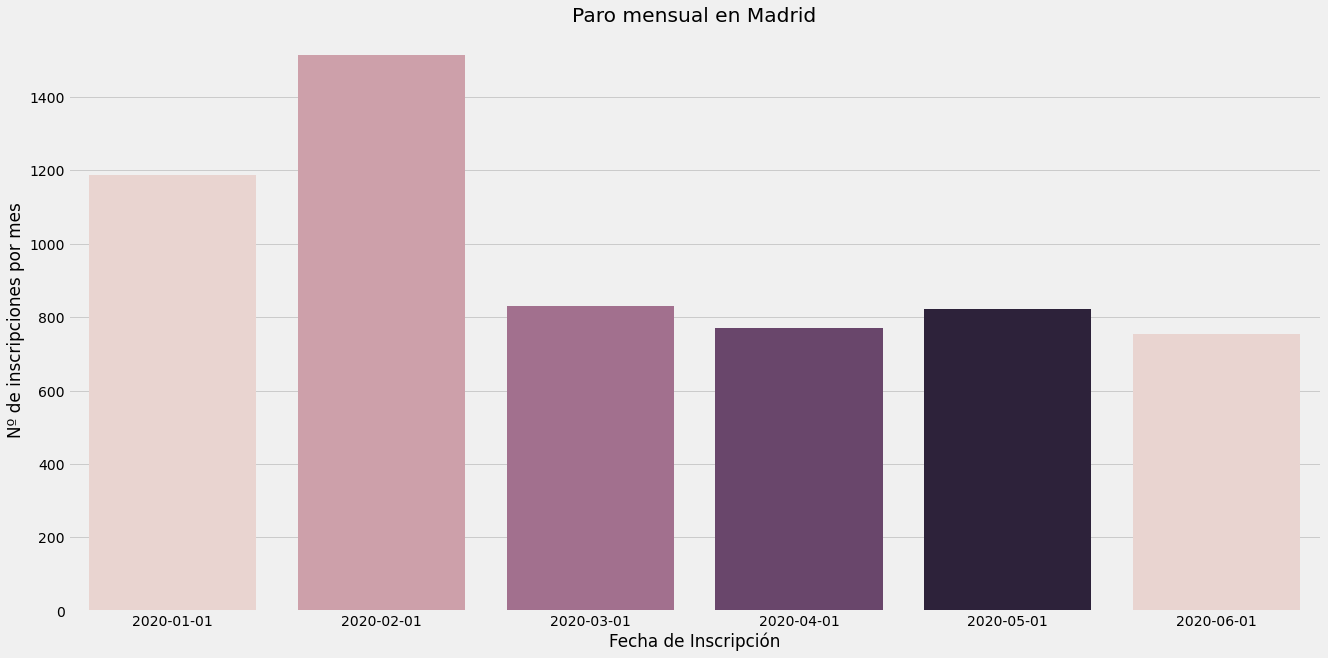

In [13]:
index5= df_20_agrupado_a.index.map(lambda t: t.strftime('%Y-%m-%d'))


vu.show_bar(df=df_20_agrupado_a, title='Paro mensual en Madrid', x=index5, y= "Nº de inscripciones por mes", palette=sns.cubehelix_palette("5"), plt=plt, sns=sns)



Por otro lado, es también interesante mostrar la evolución del paro madrileño separado por género.
En este caso, a través de la función groupby, establecemos como índice las fechas de inscripción separadas por géneros y la suma total de éstas mensualmente:

3. Evolución del paro madrileño por género.

In [14]:
df_20r = df_20.reset_index()

columnas_grafico = list(df_20r.columns[:2])
print(f"Las columnas útiles son {columnas_grafico}")

df_20_agrupado = (
    df_20r[columnas_grafico]
    .reset_index()
    .groupby(columnas_grafico)
    .count()
    .rename(columns={"index":"suma"})
)
df_20_agrupado

Las columnas útiles son ['Fecha de Inscripción', 'Género']


suma
Fecha de Inscripción Género      
2020-01-01           Hombre   478
                     Mujer    708
2020-02-01           Hombre   549
                     Mujer    964
2020-03-01           Hombre   287
                     Mujer    542
2020-04-01           Hombre   269
                     Mujer    502
2020-05-01           Hombre   313
                     Mujer    510
2020-06-01           Hombre   202
                     Mujer    553

Iterando en nuestro dataset de género, vemos la suma de inscripciones de forma más clara:

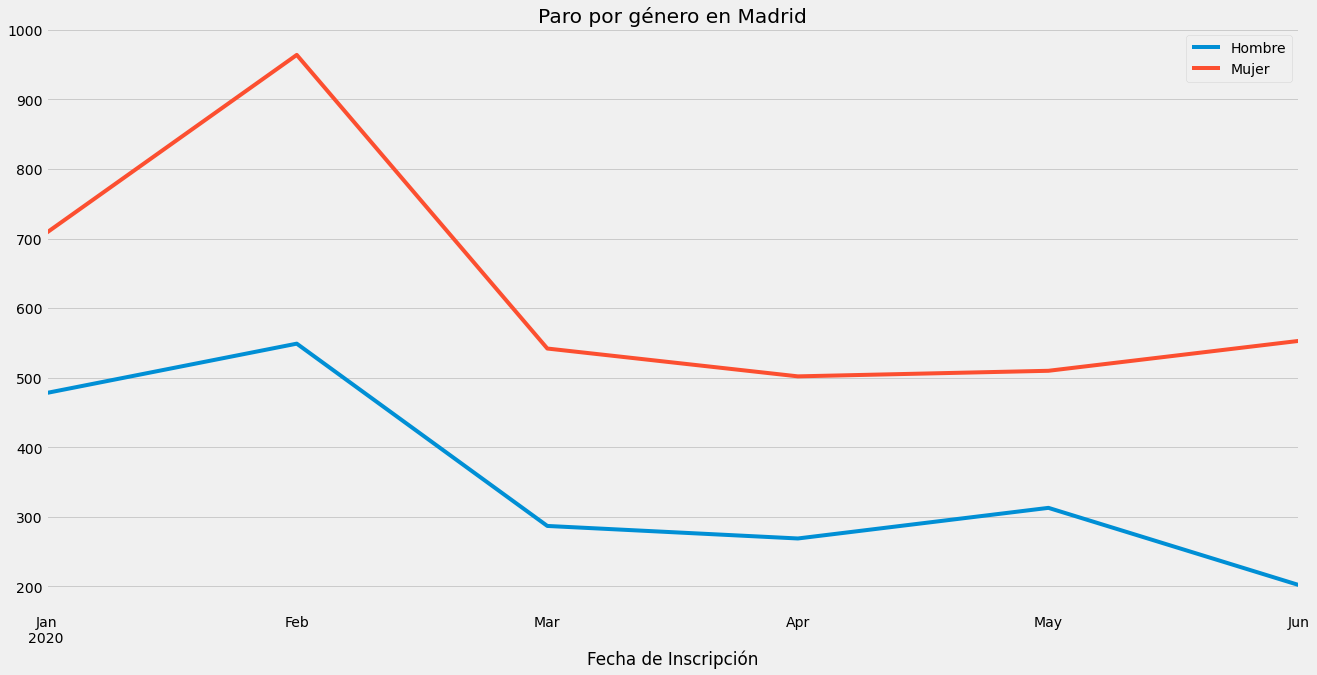

In [15]:
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(20,10) 

for key, data in df_20_agrupado.reset_index().groupby('Género'):
    data.plot(x='Fecha de Inscripción', y='suma', title="Paro por género en Madrid", ax=ax, label=key)


4. Porcentaje del paro madrileño por distrito.

Por otro lado, queremos saber cómo se ha estado dando el paro según el distrito madrileño. En este caso, nos interesa ponderar los porcentajes para visualizar mejor la correlación entre todos ellos: 

In [16]:
pie_data = (df_20.Distrito.value_counts(normalize= True)* 100).to_frame()
pie_data


,Distrito
Otro Municipio,15.092734
Puente De Vallecas,9.783903
Carabanchel,9.579718
Villaverde,7.316658
Latina,5.802280
Usera,5.155692
Ciudad Lineal,5.138676
Tetuán,4.594181
Centro,3.947592
San Blas,3.930577


array([<AxesSubplot:ylabel='Distrito'>], dtype=object)

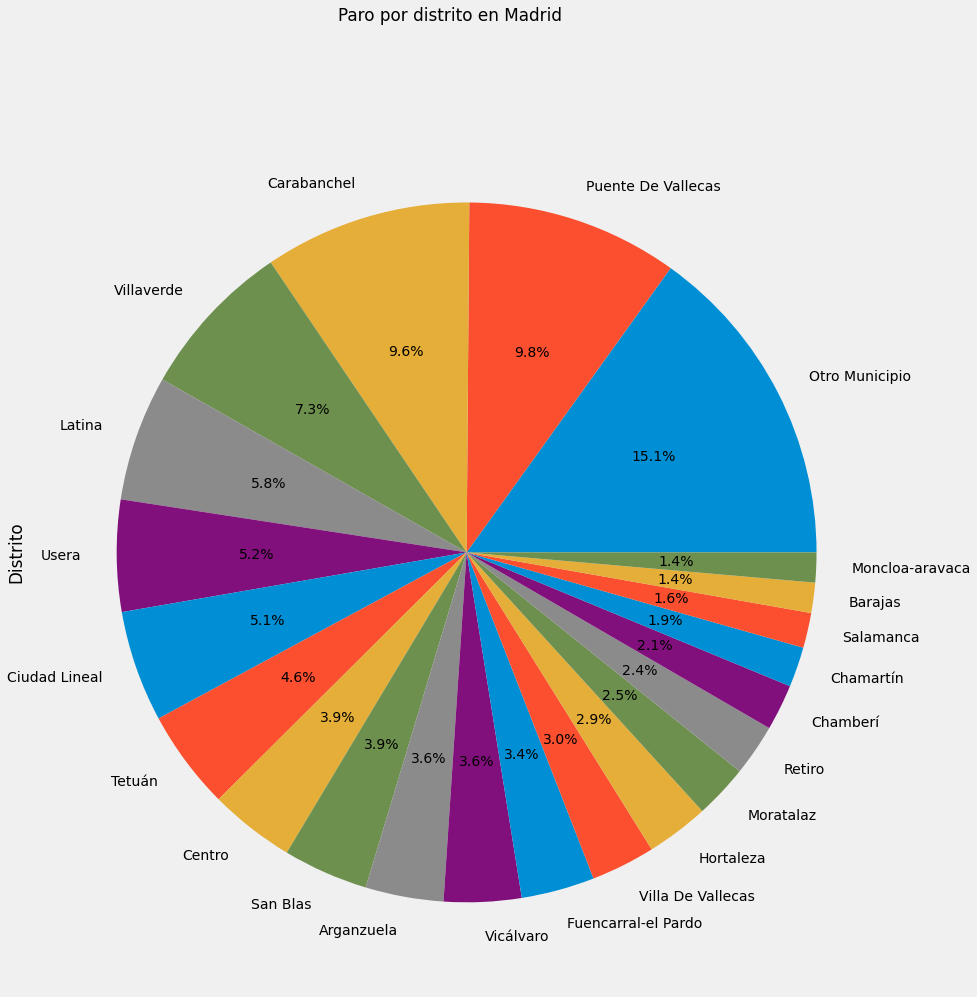

In [17]:
vu.show_pie(pie_data, title="Paro por distrito en Madrid")

5. Paro madrileño según la edad.

El paro madileño también presenta bastantes diferencias si lo clasificamos a través de diferentes tramos de edad

En este caso, convertimos una vez más la serie resultante de nuestro groupby en un nuevo dataframe para poder manipularlo y consecuentemente utilizarlo en una nueva gráfica:

In [18]:
df_TramosdeEdad= df_20["Tramos de Edad"].value_counts().to_frame()
df_TramosdeEdad

,Tramos de Edad
Entre 36 y 45 años,1527
Entre 46 y 55 años,1505
Entre 26 y 35 años,1338
Menor de 25 años,856
Entre 56 y 65 años,625
Mayor de 65 años,26


In [19]:
TramosEdad= df_TramosdeEdad.reset_index()
TramosEdad

,index,Tramos de Edad
0,Entre 36 y 45 años,1527
1,Entre 46 y 55 años,1505
2,Entre 26 y 35 años,1338
3,Menor de 25 años,856
4,Entre 56 y 65 años,625
5,Mayor de 65 años,26


Como podemos observar, la población madrileña que más ha sufrido el desempleo es la comprendida entre 36 y 45 años:

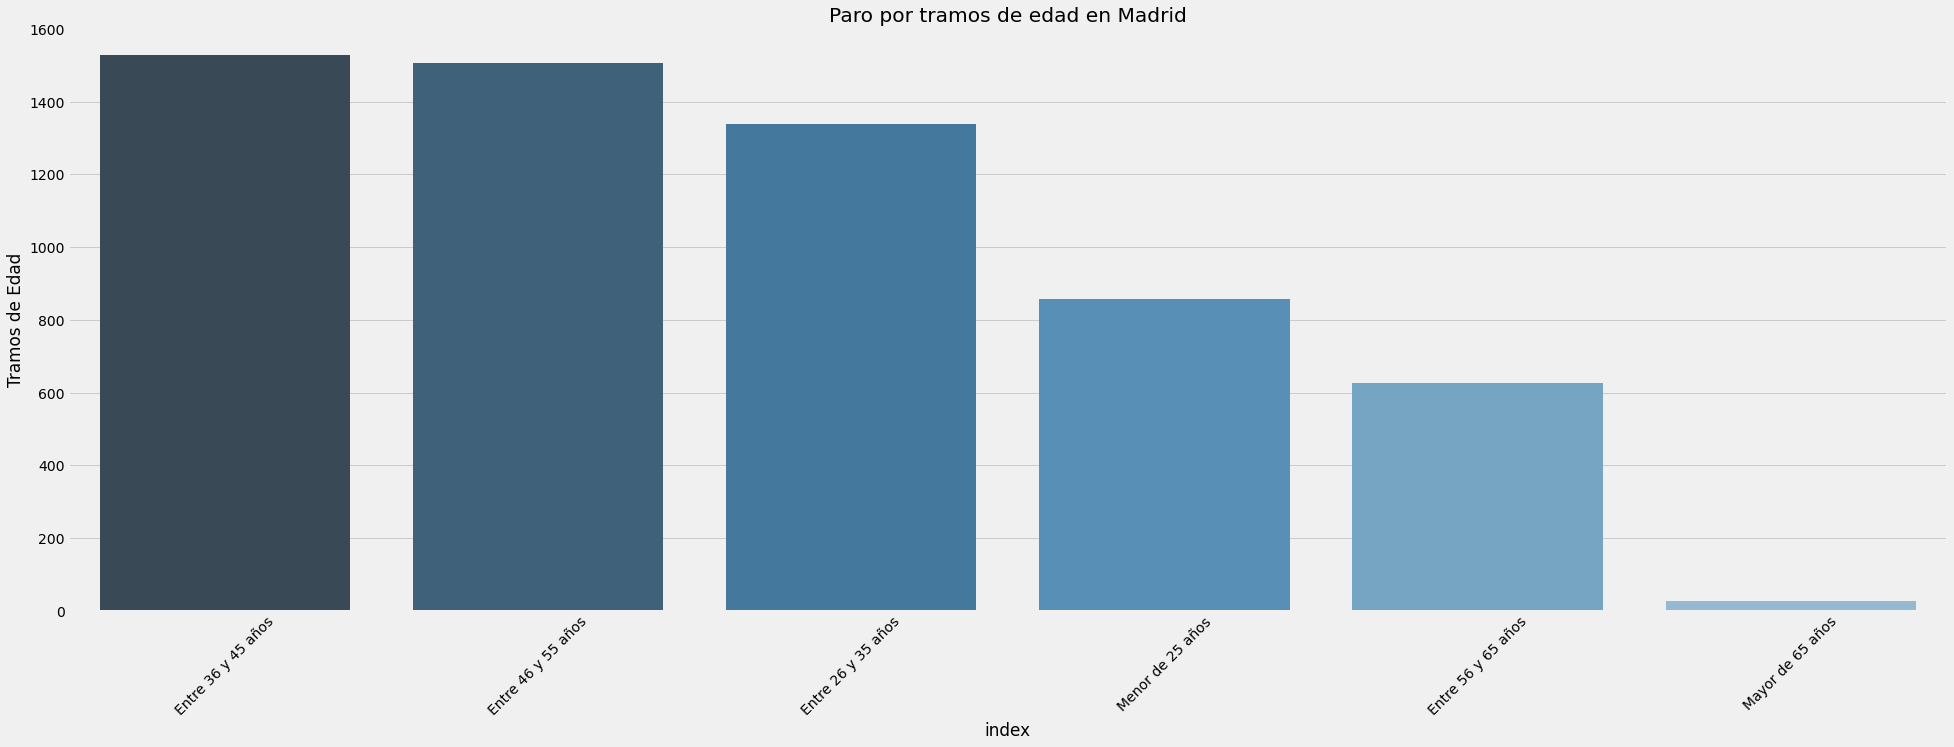

In [20]:




vu.show_bar(df=TramosEdad, title='Paro por tramos de edad en Madrid', x="index", y= "Tramos de Edad", palette="Blues_d", plt=plt, sns=sns, figsize=[30, 10], xticks_rotation=45)



6.Paro madrileño según la nacionalidad.

Es igual de necesario saber qué procedencia tienen los inscritos al desempleo. Según exploramos nuestra columna "Nacionalidad" a través de la función "vañue_counts()" nos damos cuenta de que existen tres grandes grupos: Española, seguida de la procedencia extracomunitaria y finalmente la comunitaria. 

In [21]:
df_20.Nacionalidad.value_counts()

Española            3916
Extracomunitaria    1702
Comunitaria          259
Name: Nacionalidad, dtype: int64

Reseteamos de nuevo el índice de nuestro dataframe original (df_20) donde colocamos "Fecha de Inscripción" (el índice) en una nueva columna.
Una vez hecho, colectaremos de nuevo las columnas "Fecha de Inscripción" y "Nacionalidad", y las metemos en una lista (en la variable "columnas_grafico").
De ahí, reseteamos de nuevo el índice colocando a ambas columnas como índices en un nuevo dataframe donde solo contamos con una columna que contiene la suma de cada nacionalidad por mes:

In [22]:
df_20y = df_20.reset_index()

columnas_grafico = list(df_20y[["Fecha de Inscripción", "Nacionalidad"]])
print(f"Las columnas útiles son {columnas_grafico}")

df_20_agrupado = (
    df_20y[columnas_grafico]
    .reset_index()
    .groupby(columnas_grafico)
    .count()
    .rename(columns={"index":"suma"})
)
df_20_agrupado

Las columnas útiles son ['Fecha de Inscripción', 'Nacionalidad']


suma
Fecha de Inscripción Nacionalidad          
2020-01-01           Comunitaria         57
                     Española           742
                     Extracomunitaria   387
2020-02-01           Comunitaria         75
                     Española           959
                     Extracomunitaria   479
2020-03-01           Comunitaria         43
                     Española           562
                     Extracomunitaria   224
2020-04-01           Comunitaria         29
                     Española           456
                     Extracomunitaria   286
2020-05-01           Comunitaria         31
                     Española           588
                     Extracomunitaria   204
2020-06-01           Comunitaria         24
                     Española           609
                     Extracomunitaria   122

In [23]:
for key, data in df_20_agrupado.reset_index().groupby('Nacionalidad'):
    print(key)
    print(data)
    print("----")

Comunitaria
   Fecha de Inscripción Nacionalidad  suma
0            2020-01-01  Comunitaria    57
3            2020-02-01  Comunitaria    75
6            2020-03-01  Comunitaria    43
9            2020-04-01  Comunitaria    29
12           2020-05-01  Comunitaria    31
15           2020-06-01  Comunitaria    24
----
Española
   Fecha de Inscripción Nacionalidad  suma
1            2020-01-01     Española   742
4            2020-02-01     Española   959
7            2020-03-01     Española   562
10           2020-04-01     Española   456
13           2020-05-01     Española   588
16           2020-06-01     Española   609
----
Extracomunitaria
   Fecha de Inscripción      Nacionalidad  suma
2            2020-01-01  Extracomunitaria   387
5            2020-02-01  Extracomunitaria   479
8            2020-03-01  Extracomunitaria   224
11           2020-04-01  Extracomunitaria   286
14           2020-05-01  Extracomunitaria   204
17           2020-06-01  Extracomunitaria   122
----


Observamos que la nacionalidad española que más desempleabilidad tiene previsiblemente por temas d eproporcionalidad de población, seguida de la extracomunitaria y la comunitaria:

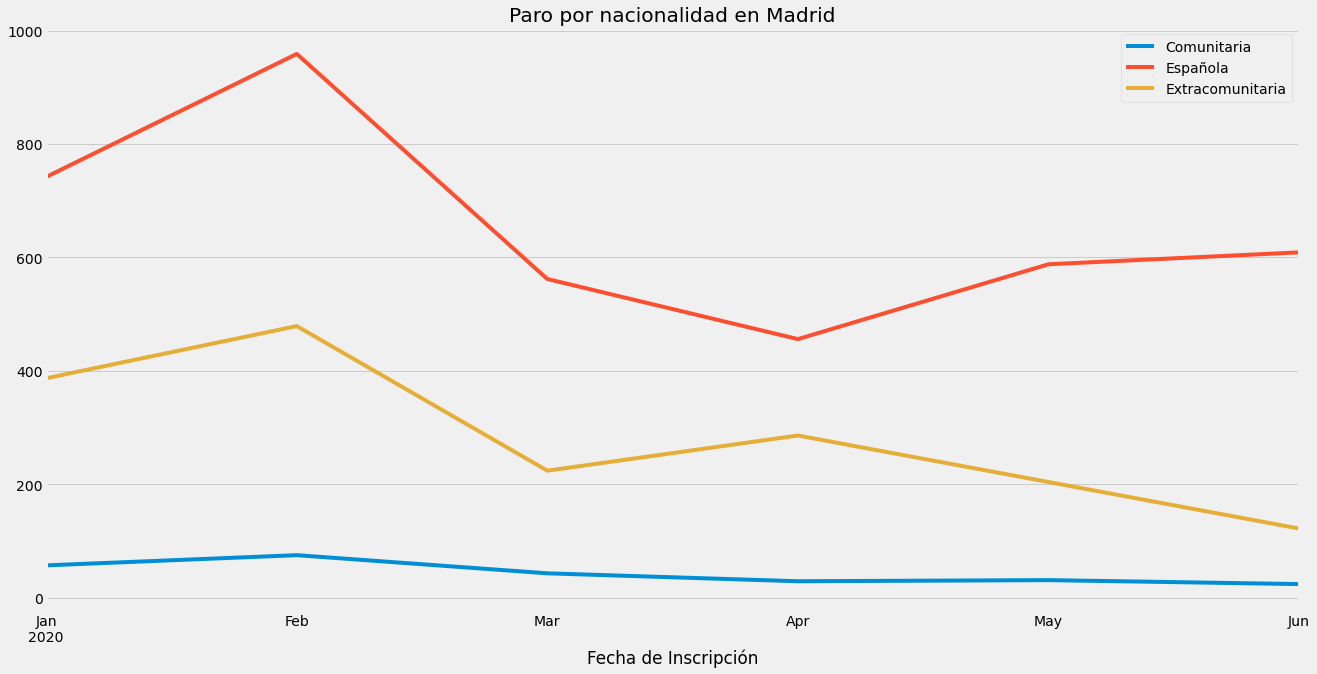

In [24]:
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(20,10)
title="Paro por nacionalidad en Madrid" 



for key, data in df_20_agrupado.reset_index().groupby('Nacionalidad'):
    data.plot(x='Fecha de Inscripción', y='suma', ax=ax, label=key, title="Paro por nacionalidad en Madrid")

Objetivos profesionales de los parados:

 - Objetivo Profesional 1:

Igualmente, observaremos las aspiraciones de cada uno de los inscritos por orden de prioridad/deseabilidad. 
En este caso, la lista de prioridades donde los inscritos desearon colocarse están divididos en tres apartados (Objetivo Profesional 1, 2, y 3).
Al encontrarnos con una media de 500 filas por cada una de ellas y al ser poco factible su representatividad en una gráfica, decidimos mostrar el top 10 de las áreas más solicitadas por los desempleados. En este caso, empezamos explorando el Objetivo Porfesional 1, que son las areas cuyos inscritos marcaron como primera opción: 

In [25]:
objetivoprofesional_top10= df_20["Objetivo Profesional 1"].value_counts().head(10).to_frame()
objetivoprofesional_top10

,Objetivo Profesional 1
Asistentes de dirección y administrativos,560
Vendedores en tiendas y almacenes,559
"Personal de limpieza de oficinas, hoteles y otros establecimientos similares",534
Trabajadores de los cuidados personales a domicilio,241
Peones del transporte de mercancías y descargadores,232
Auxiliares de enfermería hospitalaria,174
Empleados domésticos,162
Empleados administrativos con tareas de atención al público no clasificados bajo otros epígrafes,156
Ayudantes de cocina,150
Camareros asalariados,142


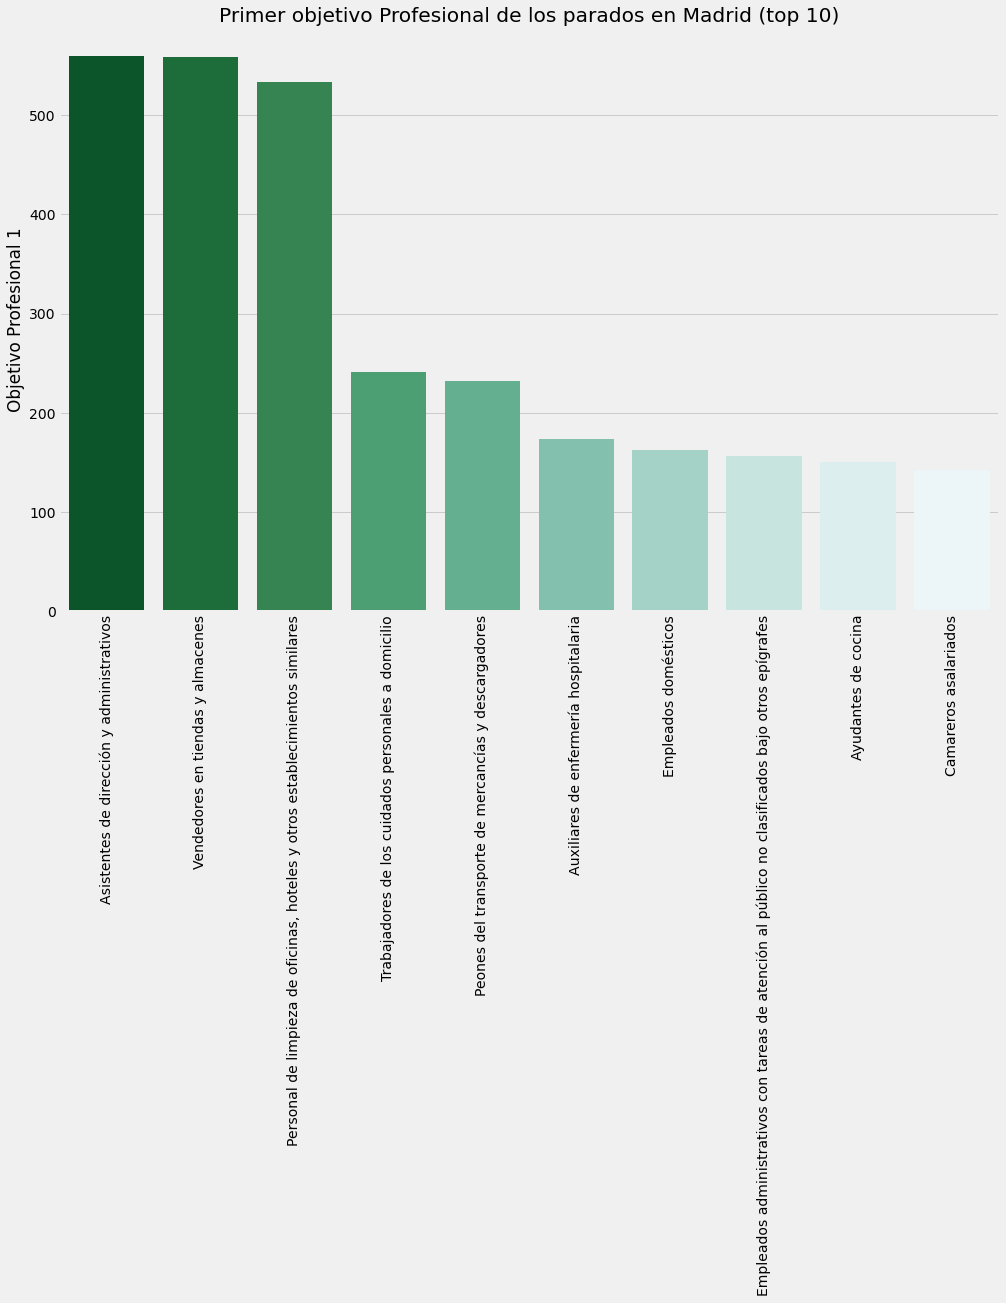

In [26]:
index1= objetivoprofesional_top10.index 


vu.show_bar(df=objetivoprofesional_top10, title='Primer objetivo Profesional de los parados en Madrid (top 10)', x=index1, y= "Objetivo Profesional 1", palette="BuGn_r", plt=plt, sns=sns, figsize=[15, 10], xticks_rotation=90)
    


- Objetivo Porfesional 2 

El Objetivo Porfesional 2 está representado en la columna de areas de trabajo descritas como segunda opción: 

In [27]:
objetivoprofesional2_top10= df_20["Objetivo Profesional 2"].value_counts().head(10).to_frame()
objetivoprofesional2_top10

,Objetivo Profesional 2
"Personal de limpieza de oficinas, hoteles y otros establecimientos similares",344
Vendedores en tiendas y almacenes,322
Trabajadores de los cuidados personales a domicilio,222
Ayudantes de cocina,206
Asistentes de dirección y administrativos,194
Reponedores,190
Empleados administrativos con tareas de atención al público no clasificados bajo otros epígrafes,181
Peones del transporte de mercancías y descargadores,175
Cajeros y taquilleros (excepto bancos),166
Empleados domésticos,153


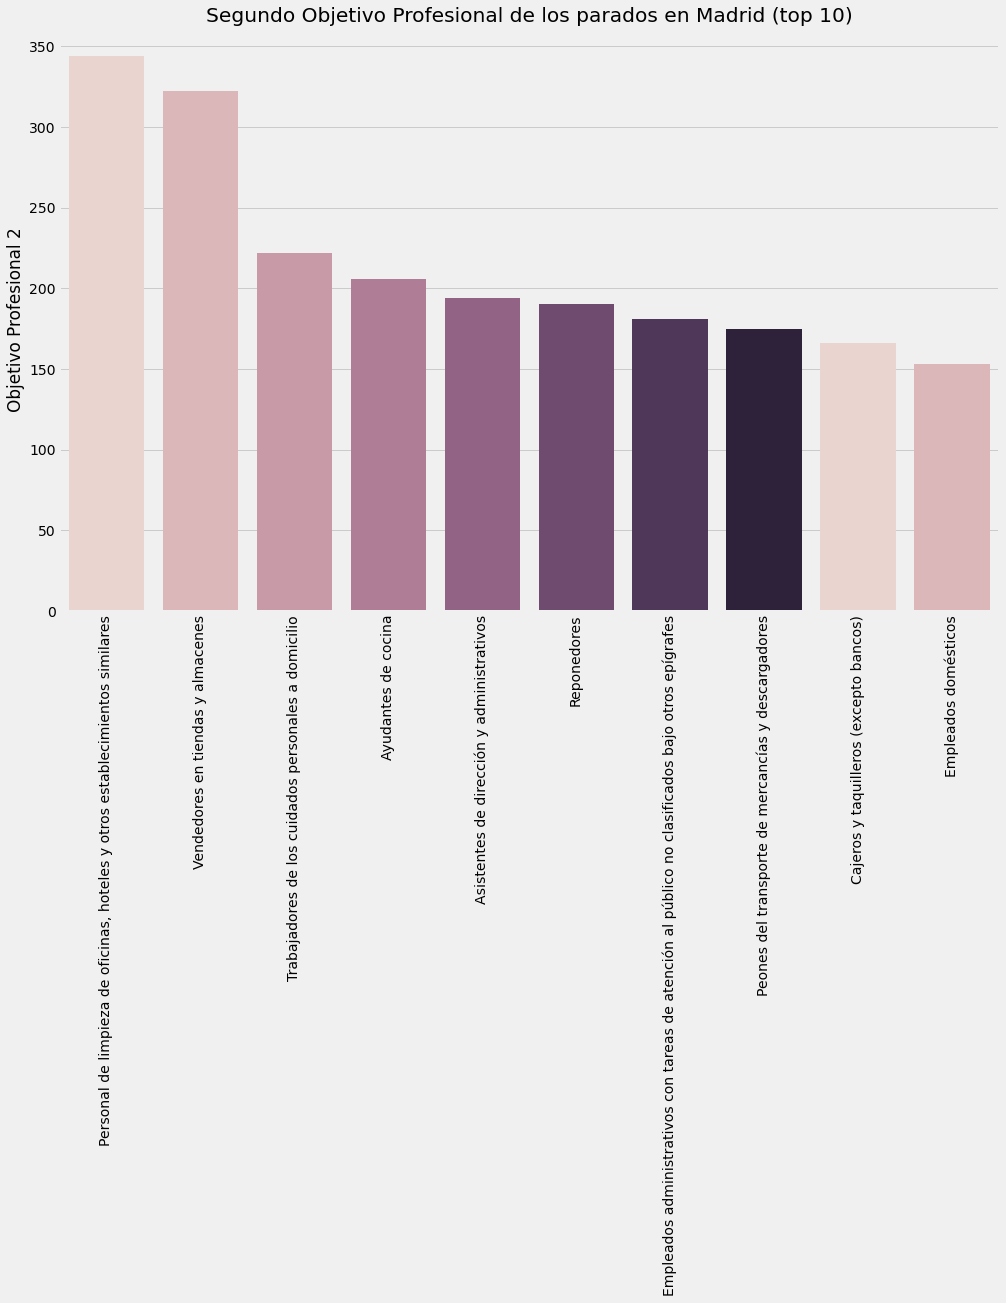

In [28]:
index2= objetivoprofesional2_top10.index 

vu.show_bar(df=objetivoprofesional2_top10, title='Segundo Objetivo Profesional de los parados en Madrid (top 10)', x=index2, y= "Objetivo Profesional 2", palette=sns.cubehelix_palette(8), plt=plt, sns=sns, figsize=[15, 10], xticks_rotation=90)


- Objetivo Porfesional 3

Finalemnte, echamos también un vistazo a la lista de los 10 puestos más solicitados en tercer puesto por orden de prioridad:

In [29]:
objetivoprofesional3_top10= df_20["Objetivo Profesional 3"].value_counts().head(10).to_frame()
objetivoprofesional3_top10

,Objetivo Profesional 3
"Personal de limpieza de oficinas, hoteles y otros establecimientos similares",271
Vendedores en tiendas y almacenes,270
Reponedores,194
Peones del transporte de mercancías y descargadores,166
Ayudantes de cocina,161
Trabajadores de los cuidados personales a domicilio,159
Recepcionistas (excepto de hoteles),141
Cajeros y taquilleros (excepto bancos),132
Camareros asalariados,113
Teleoperadores,113


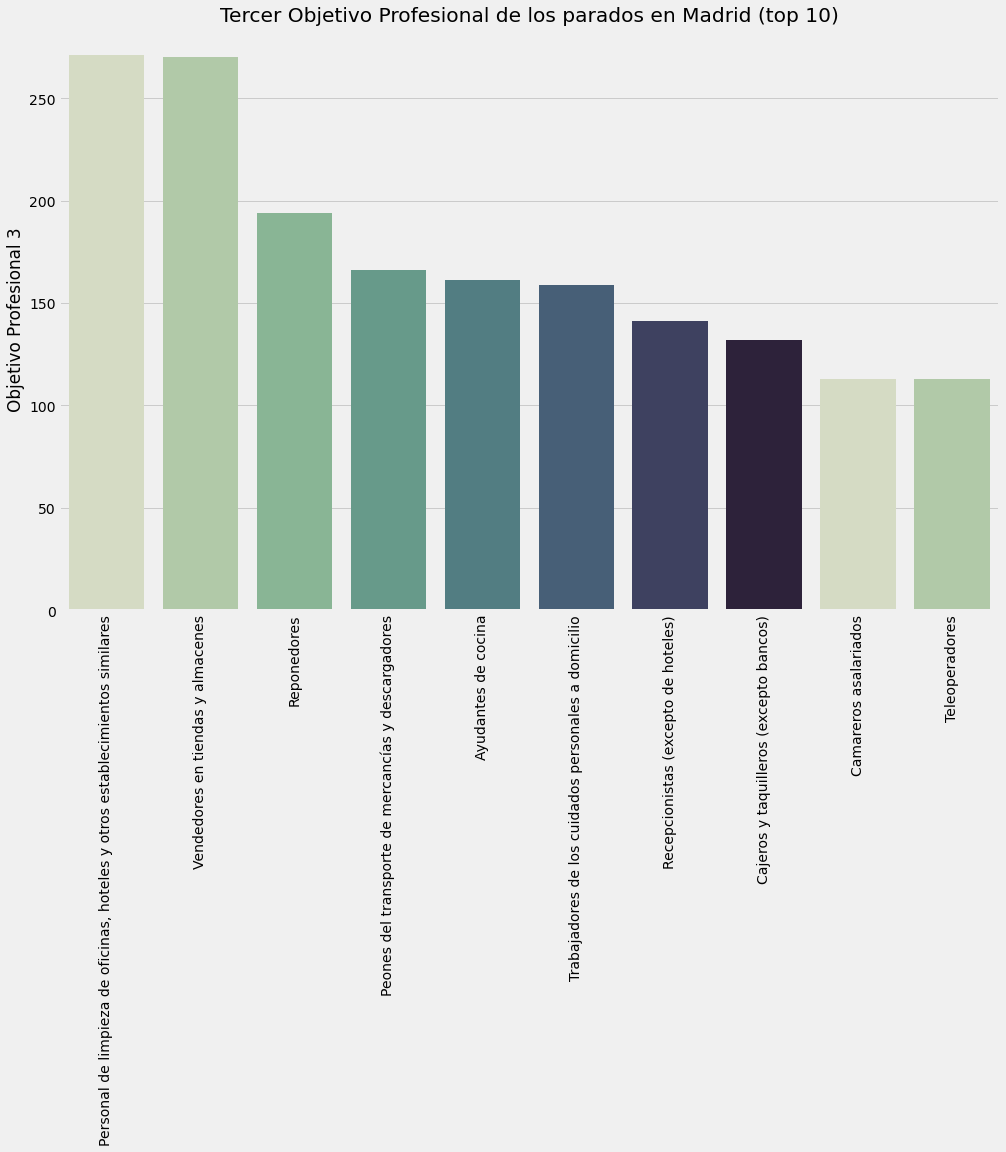

In [30]:
index3= objetivoprofesional3_top10.index 

vu.show_bar(df=objetivoprofesional3_top10, title='Tercer Objetivo Profesional de los parados en Madrid (top 10)', x=index3, y= "Objetivo Profesional 3", palette=sns.cubehelix_palette(8, start=.5, rot=-.75), plt=plt, sns=sns, figsize=[15, 10], xticks_rotation=90)